# EMPLOYEE CHURN ANALYSIS

## Problem Overview 
Find out why employees are leaving the company, and learn to predict who will leave the company.

Employee churn is a costly problem for companies. 

The true cost of replacing an employee can often be quite large.

## Problem Statement

Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance.

We will attempt to solve the following problem : <br>
-What is the likelihood of an active employee leaving the company? <br>
-What are the key indicators of an employee leaving the company? <br>
-What policies or strategies can be adopted based on the results to improve employee retention? **

Given that we have data on former employees, this is a standard **supervised classification problem** where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company. <br>

## Dataset Analysis

In this case study, a HR dataset was sourced from [IBM HR Analytics Employee Attrition & Performance](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn. <br>

As stated on the [IBM website](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) *"This is a fictional data set created by IBM data scientists"*. Its main purpose was to demonstrate the IBM Watson Analytics tool for employee attrition.

## Importing Python Libraries

In [1]:
# importing libraries for data handling and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries for data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [4]:
df=pd.read_csv('datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Shape of dataframe is: {}".format(df.shape))

Shape of dataframe is: (1470, 35)


## Overview

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [7]:
# Columns datatypes and missign values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# let's break down the columns by their type (i.e. int64, float64, object)
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

> The data provided has no missing values. In HR Analytics, employee data is unlikely to feature large ratio of missing values as HR Departments typically have all personal and employment data on-file. However, the type of documentation data is being kept in (i.e. whether it is paper-based, Excel spreadhsheets, databases, etc) has a massive impact on the accuracy and the ease of access to the HR data.

#### Numerical features overview

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


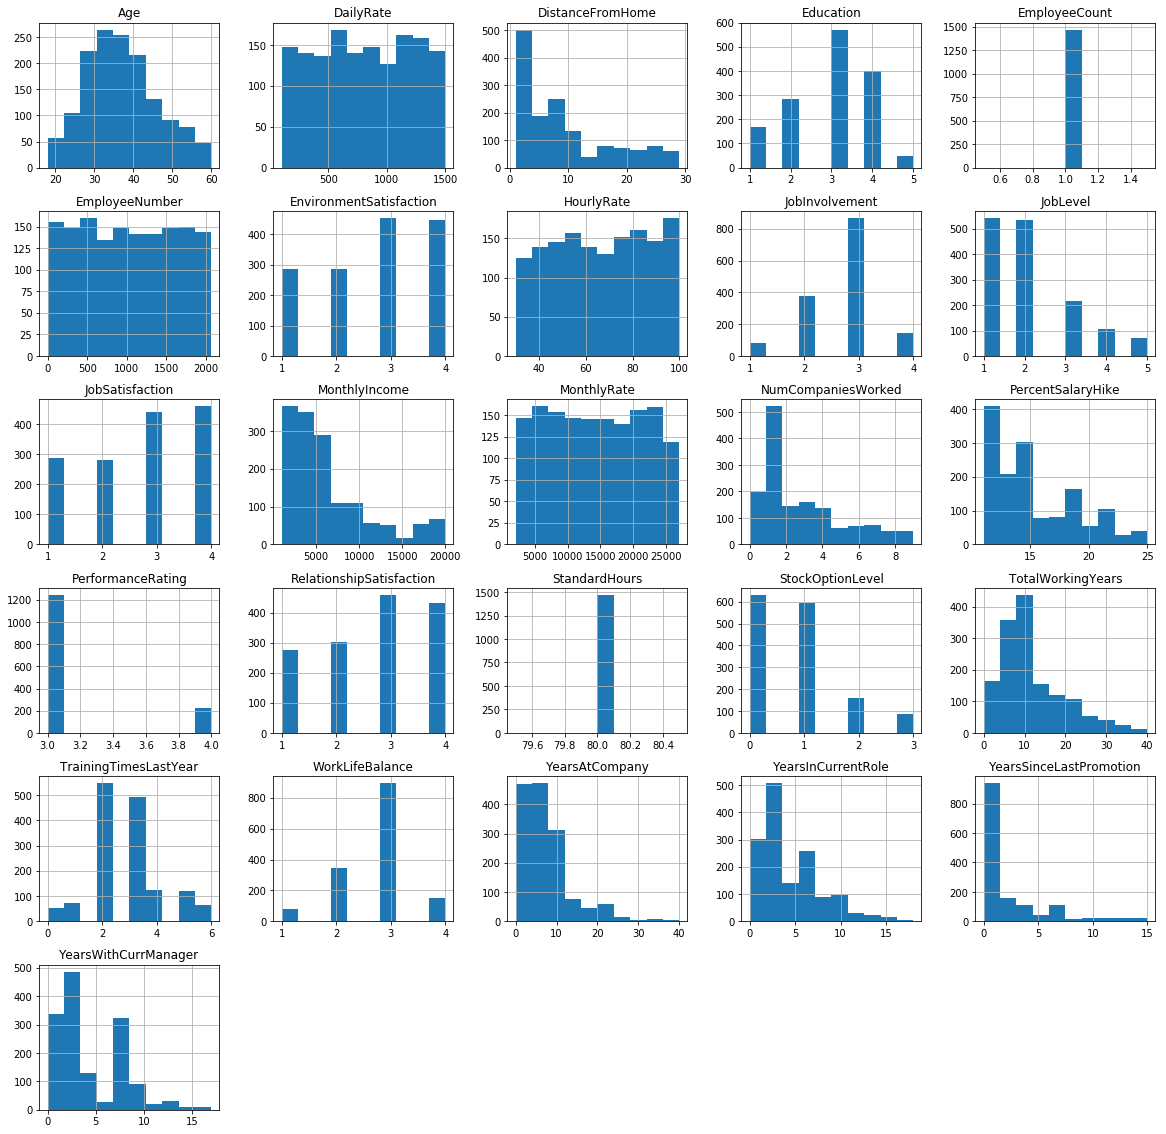

In [11]:
df.hist(figsize=(20,20));

> A few observations can be made based on the information and histograms for numerical features:
 - Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
 - Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
 - EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
 - Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

### Feature distribution by target attribute

#### Age

> The age distributions for Active and Ex-employees only differs by one year. <br>
The average age of ex-employees is **33.6** years old, while **37.6** is the average age for current employees.

In [12]:
from scipy.stats import norm
(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'Yes', 'Age'])
print('Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))

Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


> Let's create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. It will allow us to identify if there is a correlation between the Age of the Client and their ability to pay it back.

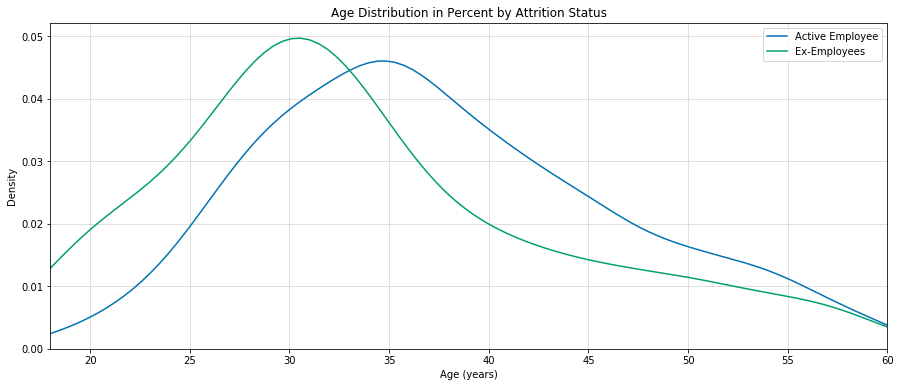

In [13]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

#### Education

> Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other. Here, I plot the normalized % of Leavers for each Education Field.

In [14]:
# Education Field of employees
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [15]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df['EducationField'].unique()):
    ratio = df[(df['EducationField']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field (%)')

#### Gender

> Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17.0% for Males and 14.8% for Females.

In [16]:
# Gender of employees
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [17]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df[(df['Attrition'] == 'Yes') & (
    df['Gender'] == 'Male')].shape[0] / df[df['Gender'] == 'Male'].shape[0])*100, (df[(df['Attrition'] == 'Yes') & (df['Gender'] == 'Female')].shape[0] / df[df['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


In [18]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df['Gender'].unique()):
    ratio = df[(df['Gender']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.iplot(kind='bar',title='Leavers by Gender (%)')

#### Marital Status

> The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). <br>
Single employees show the largest proportion of leavers at 25%.

In [19]:
# Marital Status of employees
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [20]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df['MaritalStatus'].unique()):
    ratio = df[(df['MaritalStatus']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.iplot(kind='bar',title='Leavers by Marital Status (%)')

#### Distance from Home

> Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [21]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(),
                                                                                       df['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [22]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'
      .format(    df[df['Attrition'] == 'No']['DistanceFromHome'].mean(), 
    df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


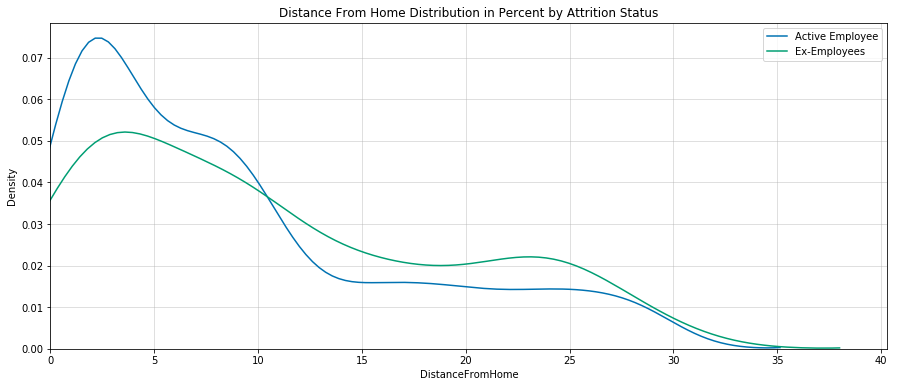

In [23]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

#### Department

> The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [24]:
# The organisation consists of several departments
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [25]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df['Department'].unique()):
    ratio = df[(df['Department']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_DF = df_Department.groupby(by="Department").sum()
df_DF.iplot(kind='bar',title='Leavers by Department (%)')

#### Role and Work Conditions

> A preliminary look at the relationship between Business Travel frequency and Attrition Status shows that there is a largest normalized proportion of Leavers for employees that travel "frequently". Travel metrics associated with Business Travel status were not disclosed (i.e. how many hours of Travel is considered "Frequent").

In [26]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [27]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df['BusinessTravel'].unique()):
    ratio = df[(df['BusinessTravel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.iplot(kind='bar',title='Leavers by Business Travel (%)')

> Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [28]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [29]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.iplot(kind='bar',title='Leavers by Job Role (%)')

> Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [30]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [31]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.iplot(kind='bar',title='Leavers by Job Level (%)')

> A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'. The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status. In other words, employees with higher Job Involvement are less likely to leave.

In [32]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [33]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df['JobInvolvement'].unique()):
    ratio = df[(df['JobInvolvement']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.iplot(kind='bar',title='Leavers by Job Involvement (%)')

> The data indicates that employees may have access to some Training. A feature indicates how many years it's been since the employee attended such training.

In [34]:
print("Number of training times last year varies from {} to {} years.".format(
    df['TrainingTimesLastYear'].min(), df['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


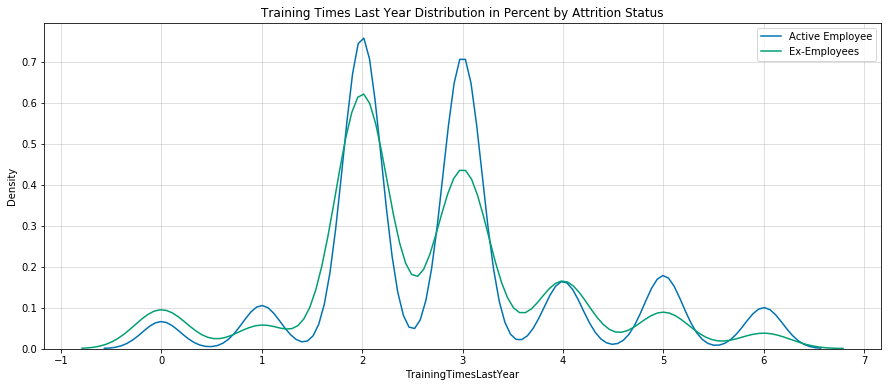

In [35]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status');

> There is a feature for the number of companies the employee has worked at. <br>
> 0 likely indicates that according to records, the employee has only worked at this company

In [36]:
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [37]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df['NumCompaniesWorked'].unique()):
    ratio = df[(df['NumCompaniesWorked']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.iplot(kind='bar',title='Leavers by Num Companies Worked (%)')

#### Years at the Company

In [38]:
print("Number of Years at the company varies from {} to {} years.".format(
    df['YearsAtCompany'].min(), df['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


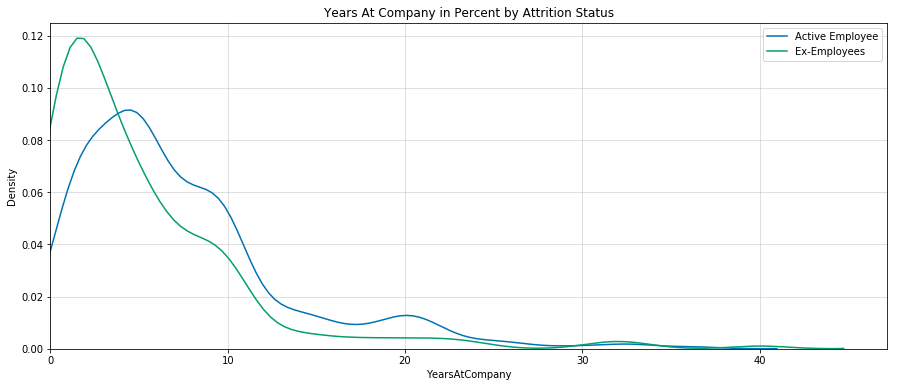

In [39]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

In [40]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df['YearsInCurrentRole'].min(), df['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


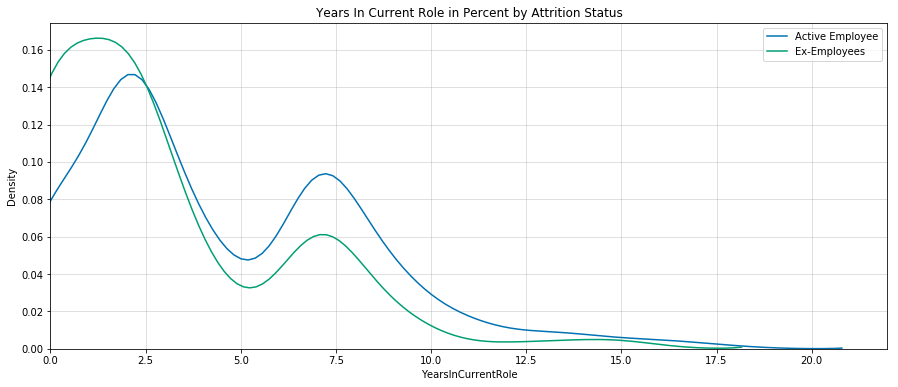

In [41]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status');

In [42]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df['YearsSinceLastPromotion'].min(), df['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


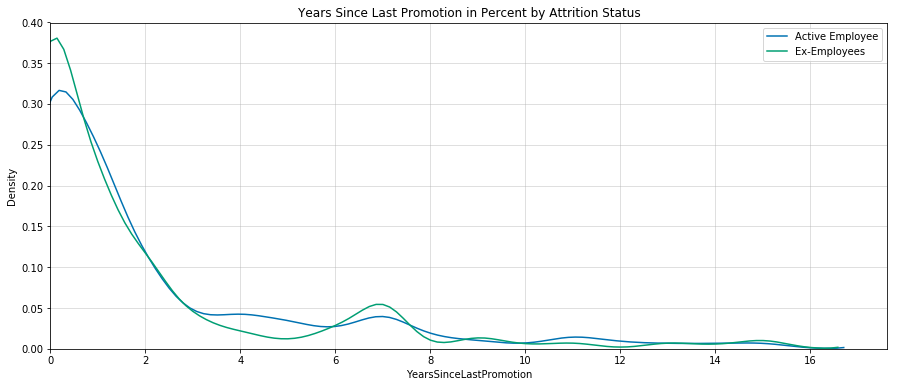

In [43]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');

In [44]:
print("Total working years varies from {} to {} years.".format(
    df['TotalWorkingYears'].min(), df['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


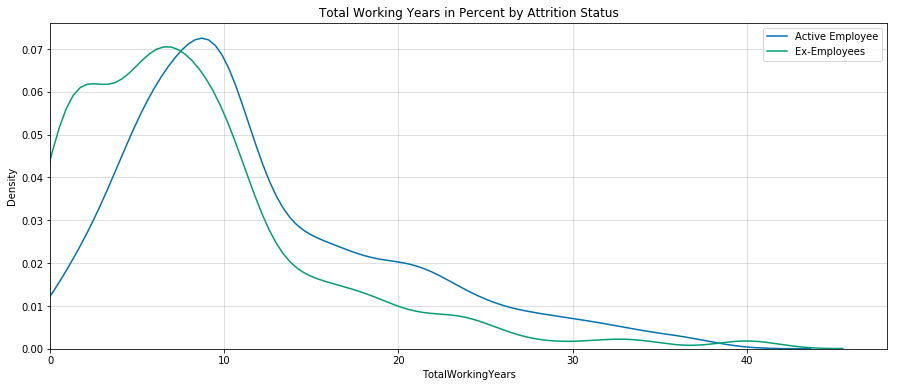

In [45]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

#### Years With Current Manager

In [46]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df['YearsWithCurrManager'].min(), df['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


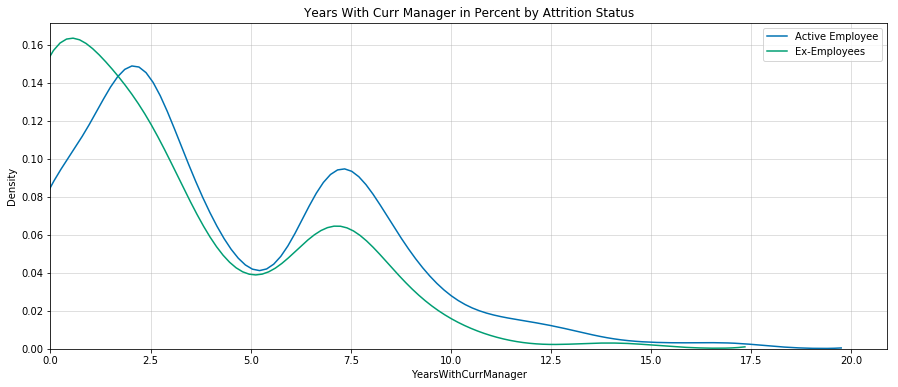

In [47]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');

#### Work-Life Balance Score

> A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [48]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [49]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.iplot(kind='bar',title='Leavers by WorkLifeBalance (%)')

> All employees have a standard 80-hour work commitment

In [50]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

> Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with OT that have left the company.

In [51]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [52]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
df_OT.iplot(kind='bar',title='Leavers by OverTime (%)')

#### Pay/Salary Employee Information

In [53]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df['HourlyRate'].min(), df['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [54]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df['DailyRate'].min(), df['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [55]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df['MonthlyRate'].min(), df['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [56]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


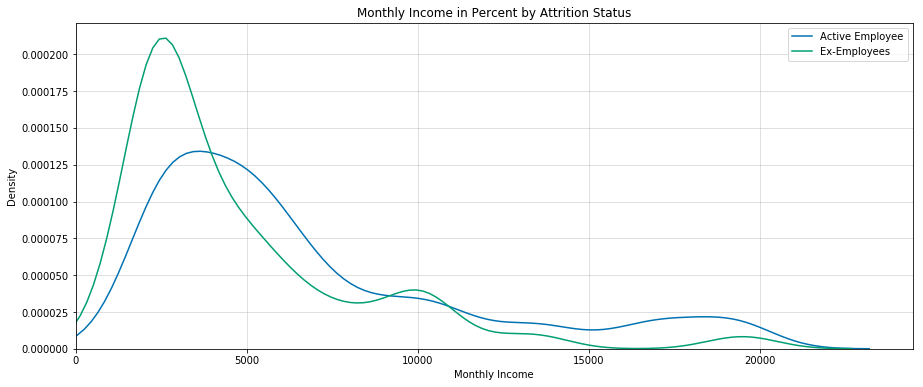

In [57]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

In [58]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df['PercentSalaryHike'].min(), df['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


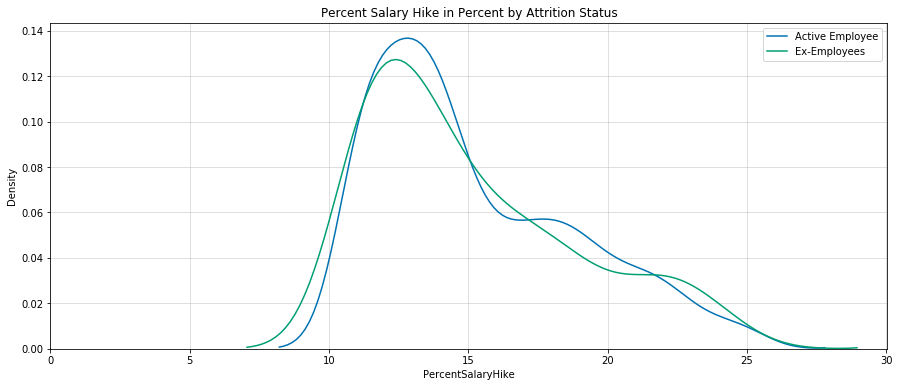

In [59]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status');

In [60]:
print("Stock Option Levels varies from {} to {}.".format(
    df['StockOptionLevel'].min(), df['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [61]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df[(df['Attrition'] == 'Yes') & (df['StockOptionLevel'] == 1)
          ].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100,
    df[(df['Attrition'] == 'Yes') & (df['StockOptionLevel'] == 2)
          ].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100,
    df[(df['Attrition'] == 'Yes') & (df['StockOptionLevel'] == 3)].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [62]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df['StockOptionLevel'].unique()):
    ratio = df[(df['StockOptionLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.iplot(kind='bar',title='Leavers by Stock Option Level (%)')

#### Employee Satisfaction and Performance Information

> Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 
Proportion of Leaving Employees decreases as the Environment Satisfaction score increases.

In [63]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [64]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df['EnvironmentSatisfaction'].unique()):
    ratio = df[(df['EnvironmentSatisfaction']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.iplot(kind='bar',title='Leavers by Environment Satisfaction (%)')

> Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 
Proportion of Leaving Employees decreases as the Job Satisfaction score increases.

In [65]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [66]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df['JobSatisfaction'].unique()):
    ratio = df[(df['JobSatisfaction']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.iplot(kind='bar',title='Leavers by Job Satisfaction (%)')

> Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.

In [67]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [68]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df['RelationshipSatisfaction'].unique()):
    ratio = df[(df['RelationshipSatisfaction']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.iplot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

> Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

In [69]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [70]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df[(df['Attrition'] == 'Yes') & (df['PerformanceRating'] == 3)
          ].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100,
    df[(df['Attrition'] == 'Yes') & (df['PerformanceRating'] == 4)].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In [71]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df['PerformanceRating'].unique()):
    ratio = df[(df['PerformanceRating']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.iplot(kind='bar',title='Leavers by Performance Rating (%)')

### Target Variable: Attrition

> The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history. 

In [72]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [73]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [74]:
df['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

> As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

> Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

### Correlation

> Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [75]:
# Find correlations with the target and sort
df_trans = df.copy()
df_trans['Target'] = df_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_trans = df_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


> Let's plot a heatmap to visualize the correlation between Attrition and these factors.

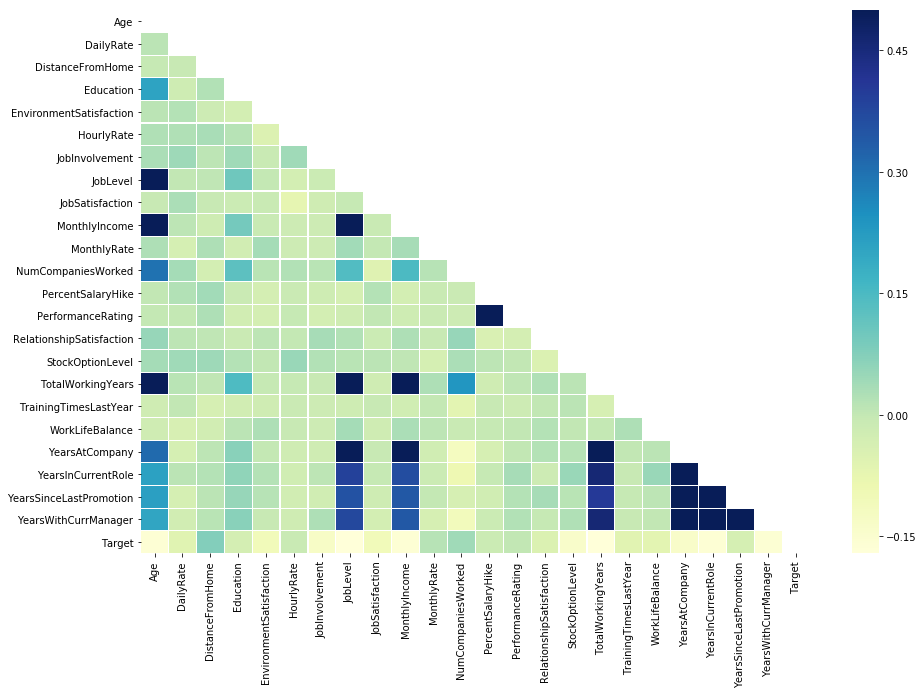

In [76]:
# Calculate correlations
corr = df_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

> As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition; <br> while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

### EDA Concluding Remarks

Let's summarise the findings from this EDA: <br>

> - The dataset does not feature any missing or erroneous data values, and all features are of the correct data type. <br>
- The strongest positive correlations with the target features are: **Performance Rating**, **Monthly Rate**, **Num Companies Worked**, **Distance From Home**. 
- The strongest negative correlations with the target features are: **Total Working Years**, **Job Level**, **Years In Current Role**, and **Monthly Income**.
- The dataset is **imbalanced** with the majoriy of observations describing Currently Active Employees. <br>
- Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18. <br>

Other observations include: <br>
> - Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts. <br>
- About 10% of leavers left when they reach their 2-year anniversary at the company. <br>
- Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts. <br>
- People who live further away from their work show higher proportion of leavers compared to their counterparts.<br>
- People who travel frequently show higher proportion of leavers compared to their counterparts.<br>
- People who have to work overtime show higher proportion of leavers compared to their counterparts.<br>
- Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.<br>
- Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.<br>

## Pre-processing Pipeline

>In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

### Encoding

> Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Lable Encoding and One-Hot Encoding as shown below.

In [77]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [78]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

In [79]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [80]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, drop_first=True)

In [81]:
print(df.shape)
df.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int32
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int32
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1

> The resulting dataframe has **49 columns** for 1,470 employees.

### Feature Scaling

> Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [83]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [84]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (1470, 49)


### Splitting data into training and testing sets

In [85]:
target = df['Attrition'].copy()
target.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float32

In [86]:
# let's remove the target feature and redundant features from the dataset
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (1470, 44)


In [87]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split  # import 'train_test_split'
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


# Model Building

In [88]:
# sklearn modules for ML model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [89]:
# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,auc

In [90]:
# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [91]:
# hold different classification models in a single dictionary
models = {}
models["Logistic_Reg"]  = LogisticRegression()
models["KNN"]           = KNeighborsClassifier()
models["SVC_Linear"]    = SVC(kernel='linear')
models["SVC_Rbf"]       = SVC(kernel='rbf')
models["Naive_Bayes"]   = GaussianNB()
models["Decision_Tree"] = DecisionTreeClassifier()
models["Random_Forest"] = RandomForestClassifier()
models["Extra_Trees"]   = ExtraTreesClassifier()
models["Bagging"]       = BaggingClassifier()
models["AdaBoost"]      = AdaBoostClassifier()
models["GradientBoost"] = GradientBoostingClassifier()
models["XGBoost"]       = XGBClassifier()
models["Light_GBM"]     = LGBMClassifier()

In [92]:
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)

# user variables to tune
folds   = 10
i=0
# 10-fold cross validation for each model
model_results_acc = []
model_results_auc = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=42)
    results_accuracy = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')
    results_roc_auc = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='roc_auc')
    

    model_results_acc.append(results_accuracy)
    model_results_auc.append(results_roc_auc)
    model_names.append(model_name)
    #print("{}: {}, {}".format(model_name, round(results_accuracy.mean(), 3), round(results_accuracy.std(), 3)),
         #round(results_roc_auc.mean(), 3), round(results_roc_auc.std(), 3))
    df_results.loc[i] = [model_name,
                         round(results_roc_auc.mean()*100, 2),
                         round(results_roc_auc.std()*100, 2),
                         round(results_accuracy.mean()*100, 2),
                         round(results_accuracy.std()*100, 2)
                         ]
    i+=1
    
print(df_results)

        Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0    Logistic_Reg         82.76         7.27          87.20          3.75
1             KNN         66.42         9.90          84.21          4.04
2      SVC_Linear         82.48         6.82          87.56          4.59
3         SVC_Rbf         78.88         8.21          84.48          4.18
4     Naive_Bayes         75.06         5.10          68.14          3.14
5   Decision_Tree         60.31         5.88          77.04          4.72
6   Random_Forest         73.24         9.88          84.57          3.43
7     Extra_Trees         74.07         4.84          85.39          3.52
8         Bagging         74.92         7.47          85.12          4.22
9        AdaBoost         79.05         6.78          86.29          2.91
10  GradientBoost         76.96         7.75          85.29          4.21
11        XGBoost         79.38         7.71          85.84          3.79
12      Light_GBM         77.80       

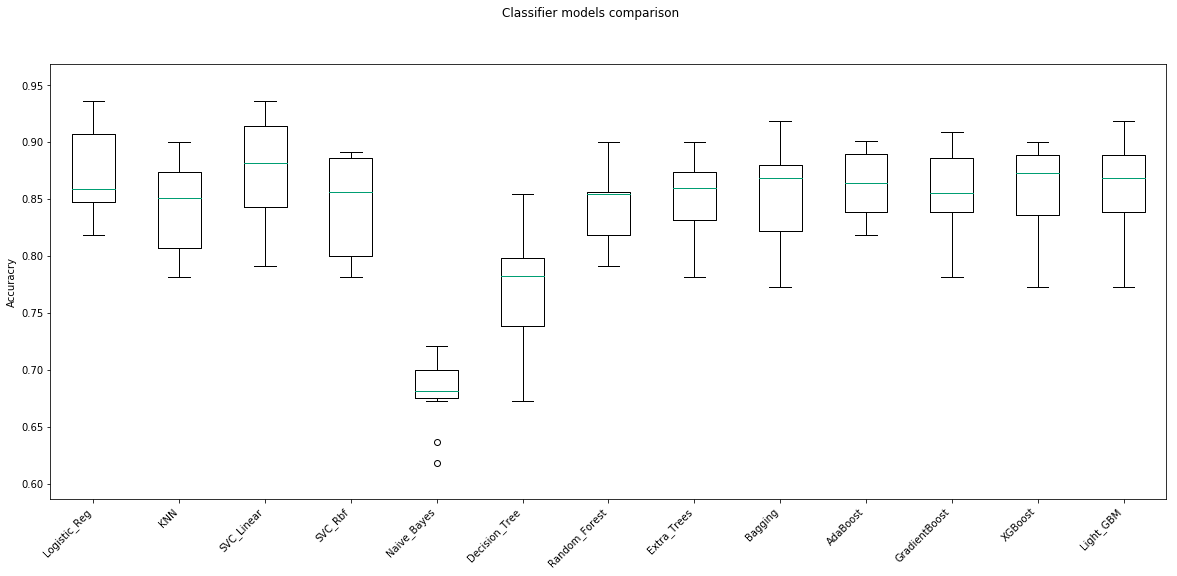

In [93]:
# box-whisker plot to compare classification models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Classifier models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results_acc)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Accuracry")
plt.margins(0.05, 0.1)

> **Classification Accuracy** is the number of correct predictions made as a ratio of all predictions made. <br> 
It is the most common evaluation metric for classification problems. However, it is often **misused** as it is only really suitable when there are an **equal number of observations in each class** and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

> **Area under ROC Curve** (or AUC for short) is a performance metric for binary classification problems. <br>
The AUC represents a **model’s ability to discriminate between positive and negative classes**. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

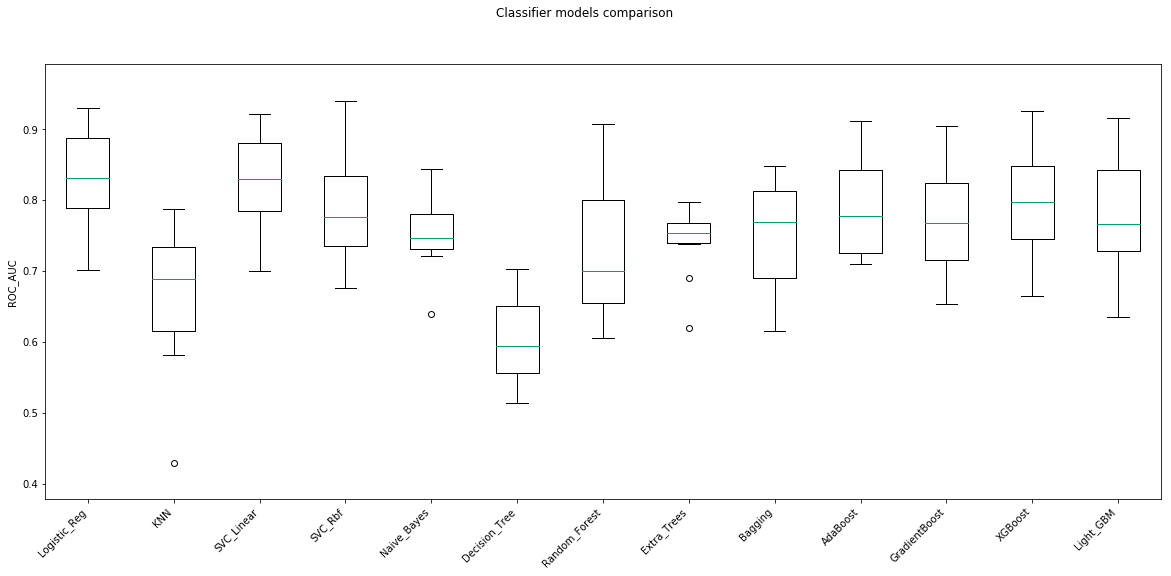

In [94]:
# box-whisker plot to compare classification models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Classifier models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results_auc)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("ROC_AUC")
plt.margins(0.05, 0.1)

> Based on our ROC AUC comparison analysis, **Logistic Regression** , **SVC**, **Extra Trees** and **Boosting Algorithms** show the highest mean AUC scores. We will shortlist these algorithms for further analysis.

## LogisticRegression

In [95]:
kfold = KFold(n_splits=10, random_state=7)
log_reg = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.82     std_value : (0.08)


#### FineTuning

In [96]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(log_reg,
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)

In [97]:
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_
print('='*20)
print("best estimator: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best estimator: LogisticRegression(C=0.05099999999999999, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.05099999999999999}
best score: 0.8180815631000706


#### Evaluation

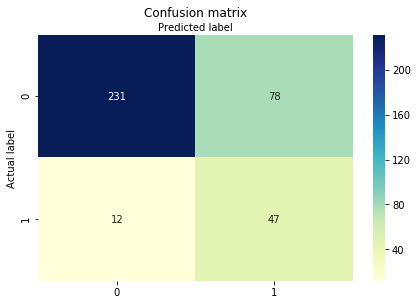

In [98]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [99]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 75.54


##### Classification report for the optimised Logistic Regression

In [100]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84       309
         1.0       0.38      0.80      0.51        59

   micro avg       0.76      0.76      0.76       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.76      0.78       368



In [101]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


## Support Vector Machine

In [102]:
svc_linear = SVC(kernel='linear',class_weight="balanced", random_state=7,probability=True)
results = cross_val_score(svc_linear, X_train, y_train, cv=10, scoring='roc_auc')
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.81     std_value : (0.06)


##### FineTuning

In [103]:
param_grid = {  'kernel': ['linear'], #'rbf', 'poly','sigmoid',
                'probability' : [True],
                #'gamma' : [0.1, 1, 10, 100],
                'C' : [0.1, 1, 10]
                #'degree' : [0, 1, 2, 3, 4, 5, 6]
             } 
svc_gs = GridSearchCV(svc_linear,
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

svc_grid = svc_gs.fit(X_train, y_train)

In [104]:
svc_opt = svc_gs.best_estimator_

In [105]:
print('='*20)
print("best estimator: " + str(svc_grid.best_estimator_))
print("best params: " + str(svc_grid.best_params_))
print('best score:', svc_grid.best_score_)
print('='*20)

best estimator: SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=7,
  shrinking=True, tol=0.001, verbose=False)
best params: {'C': 10, 'kernel': 'linear', 'probability': True}
best score: 0.8128822148897588


##### Evaluation

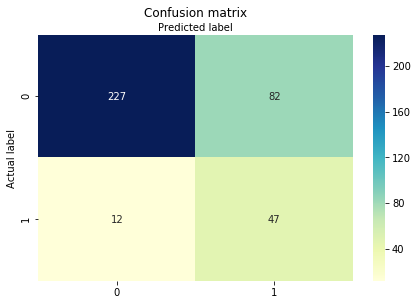

In [106]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, svc_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [107]:
print('Accuracy of Support Vector Classifier on test set: {:.2f}'.format(svc_opt.score(X_test, y_test)*100))

Accuracy of Support Vector Classifier on test set: 74.46


In [108]:
svc_opt.fit(X_train,y_train)
print(classification_report(y_test, svc_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83       309
         1.0       0.36      0.80      0.50        59

   micro avg       0.74      0.74      0.74       368
   macro avg       0.66      0.77      0.66       368
weighted avg       0.86      0.74      0.78       368



In [109]:
svc_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = svc_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
svc_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % svc_roc_auc)

AUC score: 0.854


## Random Forest

In [110]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)

results = cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='roc_auc')
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.70     std_value : (0.07)


##### FineTuning

In [111]:
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = RandomizedSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_distributions=param_grid,
                        scoring='roc_auc',
                        cv=10)

In [112]:
grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

In [113]:
print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
best params: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 10}
best score: 0.7888760561628039


> Random Forest allows us to know which features are of the most importance in predicting the target feature ("attrition" in this project). Below, we plot features by their importance.

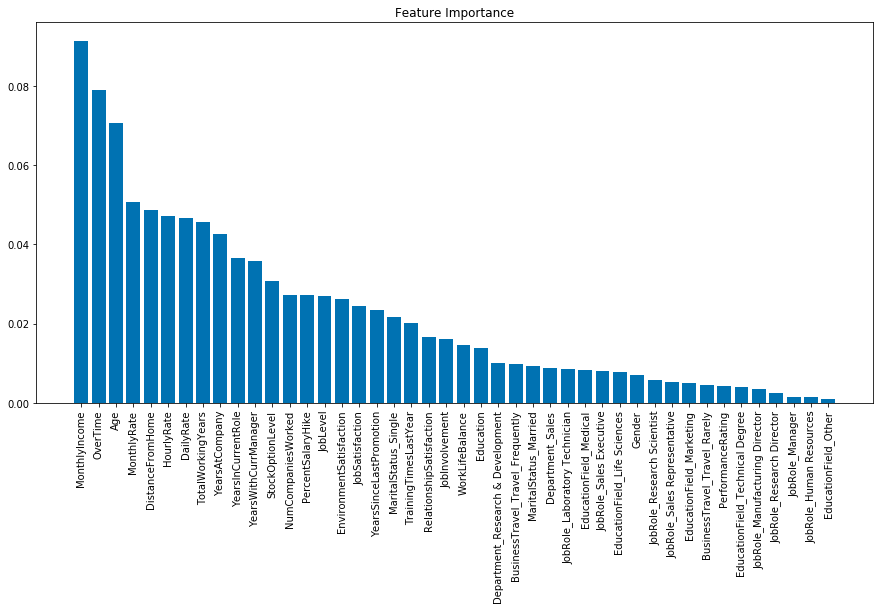

In [114]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90); # Add feature names as x-axis labels

> Random Forest helped us identify the Top 10 most important indicators (ranked in the table below).

In [115]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.091412
1,OverTime,0.078807
2,Age,0.070483
3,MonthlyRate,0.050650
4,DistanceFromHome,0.048608
5,HourlyRate,0.047183
6,DailyRate,0.046740
7,TotalWorkingYears,0.045623
8,YearsAtCompany,0.042487
9,YearsInCurrentRole,0.036654


##### `Evaluation

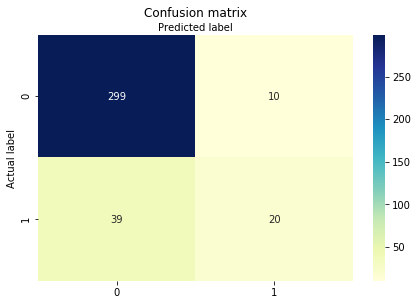

In [116]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

> The Confusion matrix provides us with a much more detailed representation of the accuracy score and of what's going on with our labels - we know exactly which/how labels were correctly and incorrectly predicted

In [117]:
print('Accuracy of RandomForest Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Classifier on test set: 86.68


In [118]:
# Classification report for the optimised RF Classifier
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       309
         1.0       0.67      0.34      0.45        59

   micro avg       0.87      0.87      0.87       368
   macro avg       0.78      0.65      0.69       368
weighted avg       0.85      0.87      0.85       368



> The resulting AUC score is higher than that best score during the optimisation step. Predicting probabilities of` a particular label provides us with a measure of how likely an employee is to leave the company.

In [119]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.827


## Extra Trees

In [120]:
et_classifier = ExtraTreesClassifier(class_weight = "balanced",
                                       random_state=7)

results = cross_val_score(et_classifier, X_train, y_train, cv=kfold, scoring='roc_auc')
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.74     std_value : (0.07)


##### FineTuning

In [121]:
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = RandomizedSearchCV(et_classifier,
                        iid=True,
                        return_train_score=True,
                        param_distributions=param_grid,
                        scoring='roc_auc',
                        cv=10)

In [122]:
grid_fit = grid_obj.fit(X_train, y_train)
et_opt = grid_fit.best_estimator_

In [123]:
print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=20, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=None, oob_score=False, random_state=7,
           verbose=0, warm_start=False)
best params: {'n_estimators': 175, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 20}
best score: 0.800210498881855


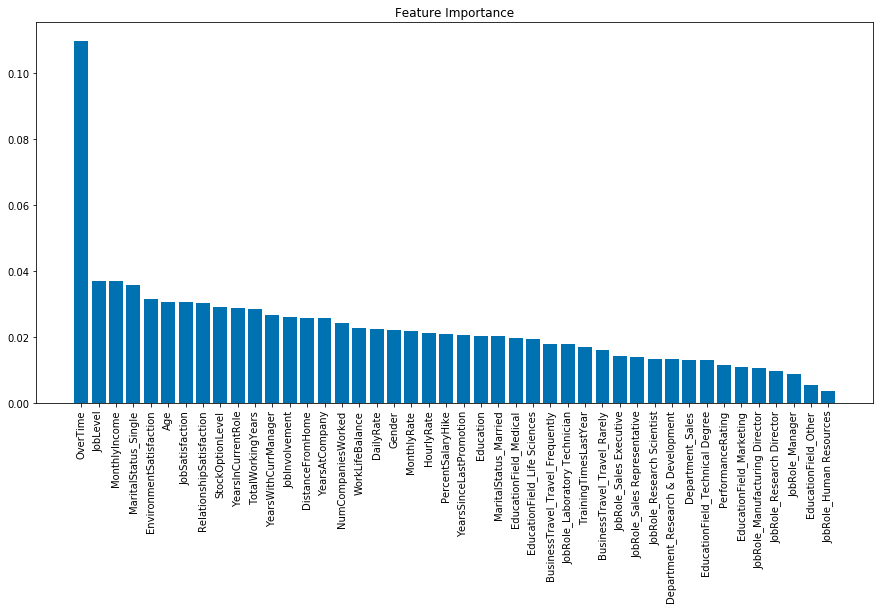

In [124]:
importances = et_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90); # Add feature names as x-axis labels

In [125]:
importances = et_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,0.109954
1,JobLevel,0.036883
2,MonthlyIncome,0.036853
3,MaritalStatus_Single,0.035711
4,EnvironmentSatisfaction,0.031674
5,Age,0.030591
6,JobSatisfaction,0.030559
7,RelationshipSatisfaction,0.030245
8,StockOptionLevel,0.029245
9,YearsInCurrentRole,0.028925


##### Evaluation

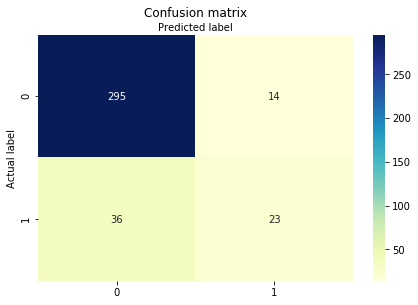

In [126]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, et_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [127]:
print('Accuracy of ExtraTrees Classifier on test set: {:.2f}'.format(et_opt.score(X_test, y_test)*100))

Accuracy of ExtraTrees Classifier on test set: 86.41


In [128]:
# Classification report for the optimised ExtraTree classifier
et_opt.fit(X_train, y_train)
print(classification_report(y_test, et_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       309
         1.0       0.62      0.39      0.48        59

   micro avg       0.86      0.86      0.86       368
   macro avg       0.76      0.67      0.70       368
weighted avg       0.85      0.86      0.85       368



In [129]:
et_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = et_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
et_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % et_opt_roc_auc)

AUC score: 0.821


## AdaBoost 

In [130]:
ad_classifier = AdaBoostClassifier(random_state=7)

results = cross_val_score(ad_classifier, X_train, y_train, cv=kfold, scoring='roc_auc')
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.79     std_value : (0.07)


In [131]:
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'learning_rate' : [0.3, 0.4, 0.5, 0.6, 0.7]
              }

grid_obj = RandomizedSearchCV(ad_classifier,
                        iid=True,
                        return_train_score=True,
                        param_distributions=param_grid,
                        scoring='roc_auc',
                        cv=10)

In [132]:
grid_fit = grid_obj.fit(X_train, y_train)
ad_opt = grid_fit.best_estimator_

In [133]:
print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.6, n_estimators=75, random_state=7)
best params: {'n_estimators': 75, 'learning_rate': 0.6}
best score: 0.8145894969223667


##### Evaluation

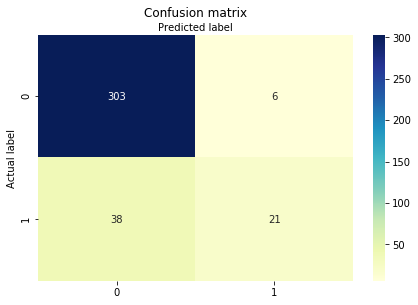

In [134]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, ad_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [135]:
print('Accuracy of AdaBoost Classifier on test set: {:.2f}'.format(ad_opt.score(X_test, y_test)*100))

Accuracy of AdaBoost Classifier on test set: 88.04


In [136]:
# Classification report for the optimised AdaBoost classifier
ad_opt.fit(X_train, y_train)
print(classification_report(y_test, ad_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       309
         1.0       0.78      0.36      0.49        59

   micro avg       0.88      0.88      0.88       368
   macro avg       0.83      0.67      0.71       368
weighted avg       0.87      0.88      0.86       368



In [137]:
probs = ad_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
ad_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % ad_opt_roc_auc)

AUC score: 0.862


## GradientBoost

In [138]:
gb_classifier = GradientBoostingClassifier(random_state=7)
results = cross_val_score(gb_classifier, X_train, y_train, cv=kfold, scoring='roc_auc')
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.77     std_value : (0.08)


In [139]:
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'learning_rate' : [0.3, 0.4, 0.5, 0.6, 0.7],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25],
              'max_features' : list(range(1,20))
              }

grid_obj = RandomizedSearchCV(gb_classifier,
                        iid=True,
                        return_train_score=True,
                        param_distributions=param_grid,
                        scoring='roc_auc',
                        cv=10)

In [140]:
grid_fit = grid_obj.fit(X_train, y_train)
gb_opt = grid_fit.best_estimator_

In [141]:
print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=5,
              max_features=14, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
best params: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 14, 'max_depth': 5, 'learning_rate': 0.3}
best score: 0.7757164644815646


##### Evaluation

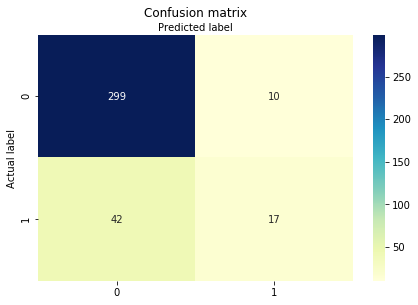

In [142]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, gb_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [143]:
print('Accuracy of GradientBoost Classifier on test set: {:.2f}'.format(gb_opt.score(X_test, y_test)*100))

Accuracy of GradientBoost Classifier on test set: 85.87


In [144]:
# Classification report for the optimised GradientBoost classifier
gb_opt.fit(X_train, y_train)
print(classification_report(y_test, gb_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       309
         1.0       0.63      0.29      0.40        59

   micro avg       0.86      0.86      0.86       368
   macro avg       0.75      0.63      0.66       368
weighted avg       0.84      0.86      0.84       368



In [145]:
probs = gb_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
gb_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % gb_opt_roc_auc)

AUC score: 0.856


## XGBoost 

In [146]:
xgb_classifier = XGBClassifier(random_state=7)
results = cross_val_score(xgb_classifier, X_train, y_train, cv=kfold, scoring='roc_auc')
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.79     std_value : (0.08)


##### FineTuning

In [147]:
param_grid = {'n_estimators': [1000,1500,2000],'learning_rate' : [0.3, 0.4, 0.5, 0.6, 0.7],
         'max_depth':list(range(1,20,2)), 'min_child_weight':list(range(1,6,1))
              }

grid_obj = RandomizedSearchCV(xgb_classifier,
                        iid=True,
                        return_train_score=True,
                        param_distributions=param_grid,
                        scoring='roc_auc',
                        cv=10)

In [148]:
grid_fit = grid_obj.fit(X_train, y_train)
xgb_opt = grid_fit.best_estimator_

In [149]:
print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.5,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=7, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
best params: {'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 1, 'learning_rate': 0.5}
best score: 0.7997232886769107


##### Evaluation

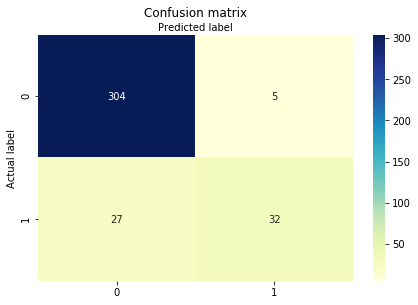

In [150]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, xgb_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [151]:
print('Accuracy of XGBoost Classifier on test set: {:.2f}'.format(xgb_opt.score(X_test, y_test)*100))

Accuracy of XGBoost Classifier on test set: 91.30


In [152]:
# Classification report for the optimised XGBoost classifier
xgb_opt.fit(X_train, y_train)
print(classification_report(y_test, xgb_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       309
         1.0       0.86      0.54      0.67        59

   micro avg       0.91      0.91      0.91       368
   macro avg       0.89      0.76      0.81       368
weighted avg       0.91      0.91      0.90       368



In [153]:
probs = xgb_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
xgb_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % xgb_opt_roc_auc)

AUC score: 0.877


## LightBGM

In [154]:
lgb_classifier = LGBMClassifier(class_weight = "balanced",random_state=7)
results = cross_val_score(lgb_classifier, X_train, y_train, cv=kfold, scoring='roc_auc')
print("AUC score : %.2f     std_value : (%.2f)" % (results.mean(), results.std()))

AUC score : 0.78     std_value : (0.08)


##### FineTuning

In [155]:
param_grid = {'n_estimators': [1000,1500,2000],'learning_rate' : [0.3, 0.4, 0.5, 0.6, 0.7],
         'max_depth':list(range(1,20,2)), 'min_child_weight':list(range(1,6,1))
              }

grid_obj = RandomizedSearchCV(lgb_classifier,
                        iid=True,
                        return_train_score=True,
                        param_distributions=param_grid,
                        scoring='roc_auc',
                        cv=10)

In [156]:
grid_fit = grid_obj.fit(X_train, y_train)
lgb_opt = grid_fit.best_estimator_

In [157]:
print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.6,
        max_depth=5, min_child_samples=20, min_child_weight=2,
        min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=31,
        objective=None, random_state=7, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)
best params: {'n_estimators': 2000, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.6}
best score: 0.7890976904104291


##### Evaluation

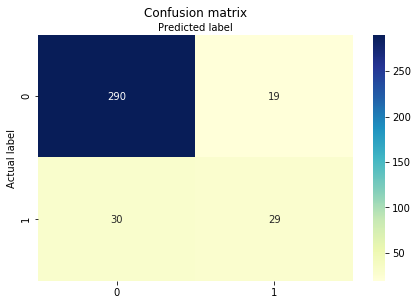

In [158]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, lgb_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [159]:
print('Accuracy of LightGBM Classifier on test set: {:.2f}'.format(lgb_opt.score(X_test, y_test)*100))

Accuracy of LightGBM Classifier on test set: 86.68


In [160]:
# Classification report for the optimised LightGBM classifier
lgb_opt.fit(X_train, y_train)
print(classification_report(y_test, lgb_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       309
         1.0       0.60      0.49      0.54        59

   micro avg       0.87      0.87      0.87       368
   macro avg       0.76      0.72      0.73       368
weighted avg       0.86      0.87      0.86       368



In [161]:
probs = lgb_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
lgb_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % lgb_opt_roc_auc)

AUC score: 0.815


### ROC Graphs

> AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). <br>

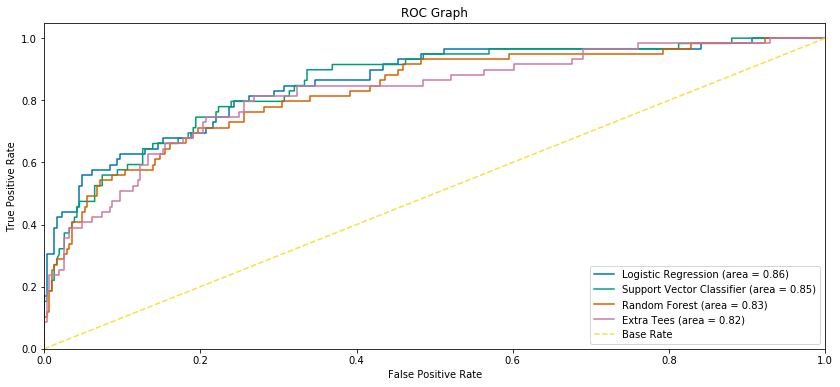

In [162]:
# Create ROC Graph

lg_fpr,  lg_tpr,  lg_thresholds     = roc_curve ( y_test,  log_opt.predict_proba(X_test)[:,1] )
svc_fpr, svc_tpr, svc_thresholds    = roc_curve ( y_test,  svc_opt.predict_proba(X_test)[:,1] )
rf_fpr,  rf_tpr,  rf_thresholds     = roc_curve ( y_test,  rf_opt.predict_proba(X_test)[:,1]  )
et_fpr,  et_tpr,  et_thresholds     = roc_curve ( y_test,  et_opt.predict_proba(X_test)[:,1]  )

plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(lg_fpr, lg_tpr, label    ='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot SVM ROC
plt.plot(svc_fpr, svc_tpr, label  ='Support Vector Classifier (area = %0.2f)' % svc_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label    ='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot ExtraTRess ROC
plt.plot(et_fpr, et_tpr, label    ='Extra Tees (area = %0.2f)' % et_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label       ='Base Rate',linestyle='dashed')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right");

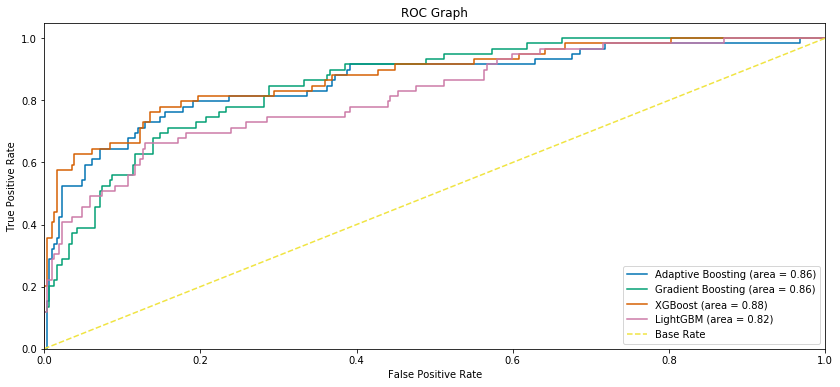

In [163]:
# Create ROC Graph

ad_fpr,  ad_tpr,  ad_thresholds     = roc_curve ( y_test,  ad_opt.predict_proba(X_test)[:,1]  )
gb_fpr,  gb_tpr,  gb_thresholds     = roc_curve ( y_test,  gb_opt.predict_proba(X_test)[:,1]  )
xgb_fpr, xgb_tpr, lgb_thresholds    = roc_curve ( y_test,  xgb_opt.predict_proba(X_test)[:,1] )
lgb_fpr, lgb_tpr, lgb_thresholds    = roc_curve ( y_test,  lgb_opt.predict_proba(X_test)[:,1] )

plt.figure(figsize=(14, 6))


# Plot AdaBoost ROC
plt.plot(ad_fpr, ad_tpr, label    ='Adaptive Boosting (area = %0.2f)' % ad_opt_roc_auc)
# Plot GradientBoost ROC
plt.plot(gb_fpr, gb_tpr, label    ='Gradient Boosting (area = %0.2f)' % gb_opt_roc_auc)
# Plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label  ='XGBoost (area = %0.2f)' % xgb_opt_roc_auc)
# Plot LightGBM ROC
plt.plot(lgb_fpr, lgb_tpr, label  ='LightGBM (area = %0.2f)' % lgb_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label       ='Base Rate' ,linestyle='dashed' )

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right");

> As shown above, the fine-tuned AdaBoost Classifier Model showed a higher AUC score

> **AdaBoost** is chosen as the preferred algorithm for building the model

# Neural Network

In [164]:
from tensorflow import keras

In [165]:
model=keras.models.Sequential([
    keras.layers.Dense(20,activation='relu',input_shape=[44]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [166]:
optimizer=keras.optimizers.Nadam(lr=0.001)
loss=keras.losses.binary_crossentropy
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

In [167]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.20,batch_size=32)

Train on 881 samples, validate on 221 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
881/881 [==============================] - 2s 2ms/sample - loss: 0.4978 - acc: 0.8229 - val_loss: 0.4696 - val_acc: 0.8281
Epoch 2/10
881/881 [==============================] - 0s 99us/sample - loss: 0.4216 - acc: 0.8411 - val_loss: 0.4472 - val_acc: 0.8281
Epoch 3/10
881/881 [==============================] - 0s 99us/sample - loss: 0.3973 - acc: 0.8411 - val_loss: 0.4287 - val_acc: 0.8281
Epoch 4/10
881/881 [==============================] - 0s 99us/sample - loss: 0.3788 - acc: 0.8422 - val_loss: 0.4144 - val_acc: 0.8326
Epoch 5/10
881/881 [==============================] - 0s 99us/sample - loss: 0.3603 - acc: 0.8445 - val_loss: 0.4061 - val_acc: 0.8326
Epoch 6/10
881/881 [==============================] - 0s 99us/sample - loss: 0.3456 - acc: 0.8547 - val_loss: 0.4012 - val_acc: 0.8371
Epoch 7/10
881/881 [==============================] - 0s 98us/sample - loss: 0.3289 - acc: 0.8638

Text(0.5, 0, 'epoch')

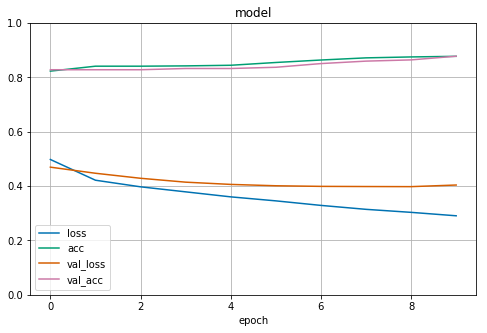

In [168]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.title('model')
plt.xlabel('epoch')

In [169]:
#Predict on test set
predictions_NN_prob = model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]
predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [170]:
#Print accuracy
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.8614130434782609


Text(0.5, 0, 'Fall-out (1-Specificity)')

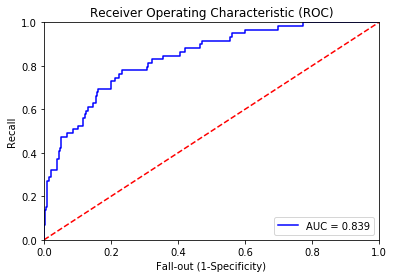

In [171]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')

> From the above results we can see the model of overfiiting
> So lets regularize the model

##### FineTuning

In [172]:
from functools import partial
Regularized_dense=partial(keras.layers.Dense, activation='selu',
                   kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l2())

model=keras.models.Sequential([
    Regularized_dense(10,input_shape=[44]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.350),
    Regularized_dense(10),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.350),
    Regularized_dense(10),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation='sigmoid')
])


optimizer=keras.optimizers.Nadam(lr=0.001)
loss=keras.losses.binary_crossentropy
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=20,validation_split=0.20,batch_size=32)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 881 samples, validate on 221 samples
Epoch 1/20
881/881 [==============================] - 3s 4ms/sample - loss: 1.1501 - acc: 0.4994 - val_loss: 0.9050 - val_acc: 0.7285
Epoch 2/20
881/881 [==============================] - 0s 151us/sample - loss: 1.0053 - acc: 0.5936 - val_loss: 0.8576 - val_acc: 0.8145
Epoch 3/20
881/881 [==============================] - 0s 152us/sample - loss: 0.9234 - acc: 0.6981 - val_loss: 0.8327 - val_acc: 0.8190
Epoch 4/20
881/881 [==============================] - 0s 158us/sample - loss: 0.8683 - acc: 0.7503 - val_loss: 0.7968 - val_acc: 0.8281
Epoch 5/20
881/881 [==============================] - 0s 151us/sample - loss: 0.8242 - acc: 0.7877 - val_loss: 0.7666 - val_acc: 0.8281
Epoch 6/20
881/881 [==============================] - 0s 161us/sample - loss: 0.7735 - acc: 0.8218 - val_loss: 0.7438 - val_acc: 0.8281
Epoch 7/20
881/881 [=====

Text(0.5, 0, 'epoch')

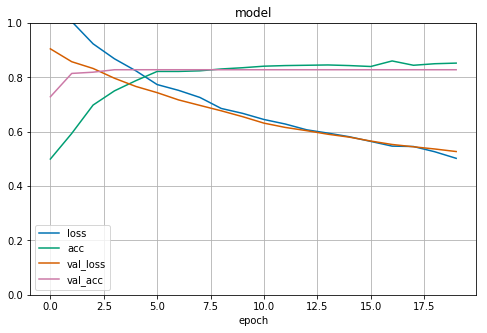

In [173]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.title('model')
plt.xlabel('epoch')

##### Evaluation

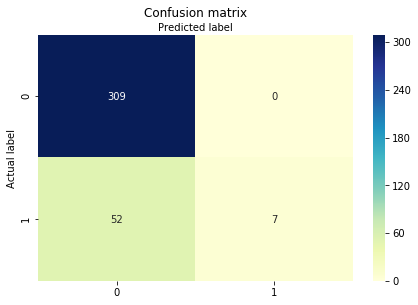

In [174]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, model.predict(X_test).round())
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [175]:
#Predict on test set
predictions_NN_prob = model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]
predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [176]:
#Print accuracy
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.8586956521739131


In [177]:
print(classification_report(y_test, model.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       309
         1.0       1.00      0.12      0.21        59

   micro avg       0.86      0.86      0.86       368
   macro avg       0.93      0.56      0.57       368
weighted avg       0.88      0.86      0.81       368



Text(0.5, 0, 'Fall-out (1-Specificity)')

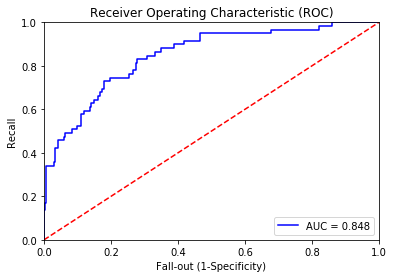

In [178]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')

>We can see some improvements in Neural Network Archiecture but not much so we will Continue with our AdaBoost Model

## Concluding Remarks

### Risk Category

As the company generates more data on its employees on New Joiners and recent Leavers, the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify **high-risk employees** of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.)

Employees can be assigning a "Risk Category" based on the predicted label such that:
- **Low-risk** for employees with label < 0.6
- **Medium-risk** for employees with label between 0.6 and 0.8
- **High-risk** for employees with label > 0.8 <br>

### Retention Plan Strategy

- The stronger indicators of people leaving include:
    - **Monthly Income**: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
    - **Over Time**: people who work overtime are more likelty to leave the company. Hence efforts  must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
    - **YearsWithCurrManager**: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager: 
        - number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency
        - number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
        - patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.
    - **Age**: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
    - **DistanceFromHome**: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
    - **TotalWorkingYears**: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.
    - **YearsAtCompany**: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

- The stronger indicators of people leaving include:
    - **Monthly Income**: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
    - **Over Time**: people who work overtime are more likelty to leave the company. Hence efforts  must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
    - **YearsWithCurrManager**: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager: 
        - number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency
        - number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
        - patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.
    - **Age**: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
    - **DistanceFromHome**: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
    - **TotalWorkingYears**: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.
    - **YearsAtCompany**: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.